In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

To do: 
1. Reconstruct yesterday's outcome
2. Clean the individual files. 
3. Prepare for analysis. 
4. Produce wordcloud

# 1. Reconstruct yesterday's outcome

Get the data from csv: 

In [6]:
# back to the directory.
path = "C:\\Users\\johag\\Documents\\programming\\NLP\\projects\\Food_prices"
os.chdir(path)
os.listdir()


['230313plan.txt',
 'food_comments1.csv',
 'food_comments2.csv',
 'food_raw1.txt',
 'Meta_info.txt',
 'reddit_food_prices.txt',
 'reddit_food_prices_long.txt',
 'reddit_food_prices_long_macro.txt',
 'reddit_food_prices_long_trash.txt']

In [7]:
food_comments3 = pd.read_csv('food_comments2.csv')

In [79]:
food_comments3

,names,country,level,comment,comment_length
0,never_stop_asking,United States of America,0,United States of America\nWhy are grocery pric...,442
1,justaprettyturtle,Poland,1,Poland\nCommon agricultural policy of European...,332
2,tomas_paulicek,Slovakia,2,"Slovakia\nAlso, the minimum wage varies widely...",258
3,justaprettyturtle,Poland,3,"Poland\nYes, but less and less so. I know peop...",315
4,tomas_paulicek,Slovakia,4,Slovakia\nI'm not exactly talking about expats...,246
...,...,...,...,...,...
144,youmiribez,France,5,"France\nYeah that's what I also thought, espec...",126
145,ColossusOfChoads,United States of America,6,American in Italy\nWe have a fair amount of th...,425
146,keiner,no_country,1,They are? Lidls in Finland are 30 % more expen...,120
147,HelmutGolli,Finland,2,Finland\nBut are they really? Last time I was ...,438


In [104]:
#food_comments3["names"].loc([food_comments3["country" == "Poland"]]).nunique()
#Poles = food_comments3["names"].loc([food_comments3["country"] == "Poland"])
Poles = food_comments3["names"][food_comments3["country"] == "Poland"].nunique()


In [105]:
Poles

4

In [9]:
#Get the list of countries: 
country = ['United States of America', 'Poland', 'Slovakia', 'Spain', 'Ukraine', 'Germany', 'Finland', 'no_country', 'Lithuania', 'Norway', 'Switzerland', 'Netherlands', 'Wales', 'United Kingdom', 'Estonia', 'Hungary', 'Belgium', 'England', 'Luxembourg', 'France', 'Italy']

In [10]:
#refresh

['United States of America',
 'Poland',
 'Slovakia',
 'Spain',
 'Ukraine',
 'Germany',
 'Finland',
 'no_country',
 'Lithuania',
 'Norway',
 'Switzerland',
 'Netherlands',
 'Wales',
 'United Kingdom',
 'Estonia',
 'Hungary',
 'Belgium',
 'England',
 'Luxembourg',
 'France',
 'Italy']

We can expand some more on this by specifying where the contributors are from, how many posts they are responsible for, and how much text these posts make up.

In [77]:
country_share = pd.DataFrame({"country": country})

In [78]:
country_share

,country
0,United States of America
1,Poland
2,Slovakia
3,Spain
4,Ukraine
5,Germany
6,Finland
7,no_country
8,Lithuania
9,Norway


In [106]:
#Poster, Posts and text volume by country:
country_share["Poster"] = country_share["country"].apply(lambda x: food_comments3["names"][food_comments3["country"] == x].nunique())

In [108]:
country_share['Posts'] = country_share["country"].apply(lambda x: food_comments3["names"][food_comments3["country"] == x].count())

In [111]:
country_share['textlength'] = country_share["country"].apply(lambda x: len(countrytext(x)))

In [128]:
country_share['posts_per_poster'] = country_share['Posts']/country_share['Poster']

In [129]:
country_share['text_volume_per_poster'] = country_share['textlength']/country_share['Poster']

In [130]:
country_share

,country,Poster,Posts,textlength,posts_per_poster,text_volume_per_poster
0,United States of America,6,20,5216,3.333333,869.333333
1,Poland,4,12,3366,3.000000,841.500000
2,Slovakia,1,2,504,2.000000,504.000000
3,Spain,5,20,5255,4.000000,1051.000000
4,Ukraine,1,1,355,1.000000,355.000000
5,Germany,1,1,113,1.000000,113.000000
6,Finland,3,4,951,1.333333,317.000000
7,no_country,15,55,12170,3.666667,811.333333
8,Lithuania,1,1,106,1.000000,106.000000
9,Norway,3,5,1135,1.666667,378.333333


I would like to make three pie charts, illustrating the categories Poster, Posts, and Textlength. To prevent chaos, I will only consider countries with more than one poster.

In [115]:
large_country_share = country_share[country_share['Poster'] > 1]

In [116]:
large_country_share

,country,Poster,Posts,textlength
0,United States of America,6,20,5216
1,Poland,4,12,3366
3,Spain,5,20,5255
6,Finland,3,4,951
7,no_country,15,55,12170
9,Norway,3,5,1135
13,United Kingdom,4,4,1316


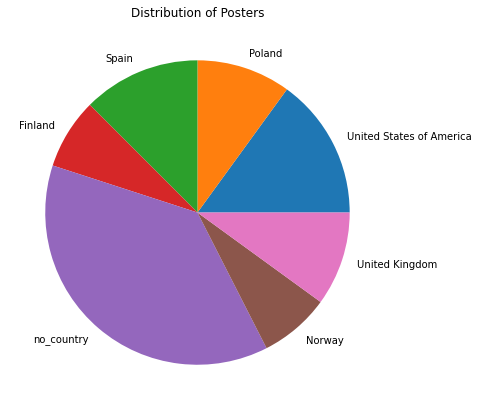

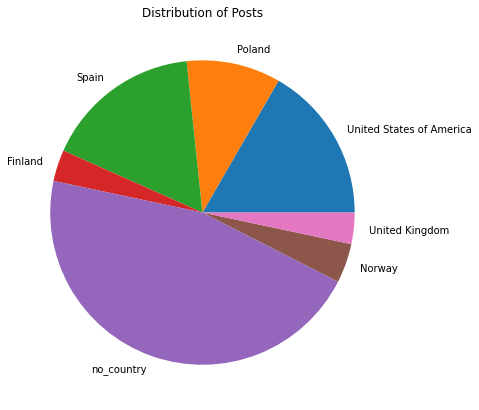

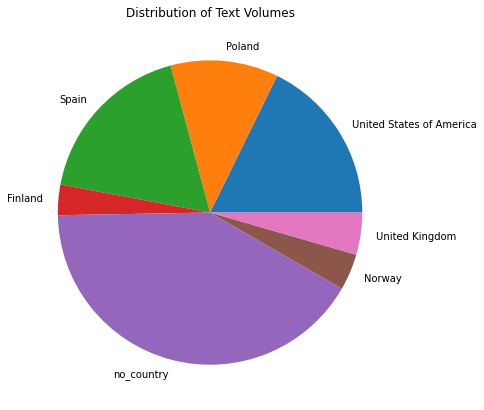

In [125]:
#large_country_share['Poster'].plt.pie()


# Creating dataset
countries = large_country_share['country']

data = large_country_share['Poster']

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = countries)
plt.title("Distribution of Posters")

# show plot
plt.show()


# Creating dataset
countries = large_country_share['country']

data = large_country_share['Posts']

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = countries)
plt.title("Distribution of Posts")

# show plot
plt.show()



# Creating dataset
countries = large_country_share['country']

data = large_country_share['textlength']

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = countries)
plt.title("Distribution of Text Volumes")

# show plot
plt.show()


In [11]:
# The function takes a country name as an argument and spits out all the texts written by its citizens. 
def countrytext(land):
    landish =  food_comments3[food_comments3["country"] == land]
    landtext = ""
    for i in landish["comment"]:
        landtext = landtext + i
    return landtext

In [12]:
#An example of what we get
countrytext("Netherlands")

"Netherlands\nI've been to Switzerland once, and the groceries there were so eye-wateringly expensive that I'm not sure I'll every go back! Probably didn't help that the campsite we were staying was in a tiny town at the end of a valley, so they only had a tiny supermarket. Our second destination was Geneva so we stayed in France. Guess what the license plates in the supermarket parking lots looked like. Groceries were still relatively expensive there BTW, but I guess the Swiss didn't care bc it was half the price of stuff in Switzerland\n\n\n2\n\nShareNetherlands\nWas in a baking sub a few days ago and an American recommended an imported Dutch brand of cocoa powder, which is apparently really pretty popular in the US as it's one of the highest quality products around, much better than other brands, even supposed luxury brand. They attached a link where you could buy a 250g pack on Amazon for $12.\n\nThat same brand is sold in regular supermarkets here as something that's pretty much t

In [13]:
#Getting all country lists:
laender_texte = {}

for i in country:
    laender_texte[i] = countrytext(i)

Now we can access every country via the dictionary laender_texte. Germany is really short. 

In [14]:

laender_texte["Germany"]

'Germany\nEh, its rather that we have a few buyers dominating the market and thus pressing down prices.\n\n\n14\n\nShare'

Some info about these countries, but it's not suitably ordered: 

In [16]:
for i in country:
    balad = i
    laenge = str(len(countrytext(i)))
    print(f"The texts from {balad} are {laenge} characters long.")

The texts from United States of America are 5216 characters long.
The texts from Poland are 3366 characters long.
The texts from Slovakia are 504 characters long.
The texts from Spain are 5255 characters long.
The texts from Ukraine are 355 characters long.
The texts from Germany are 113 characters long.
The texts from Finland are 951 characters long.
The texts from no_country are 12170 characters long.
The texts from Lithuania are 106 characters long.
The texts from Norway are 1135 characters long.
The texts from Switzerland are 399 characters long.
The texts from Netherlands are 1236 characters long.
The texts from Wales are 1958 characters long.
The texts from United Kingdom are 1316 characters long.
The texts from Estonia are 245 characters long.
The texts from Hungary are 202 characters long.
The texts from Belgium are 563 characters long.
The texts from England are 6241 characters long.
The texts from Luxembourg are 2101 characters long.
The texts from France are 668 characters l

In [18]:
#it would be nice to put order in this structure, descending from the longest one.
kuni=[]
nagasa=[]

for i in country:
    kuni.append(i)
    nagasa.append(str(len(countrytext(i))))

textlaenge = pd.DataFrame({
    'country': kuni,
    'text_length': nagasa
})

In [20]:
#Getting the types right: 
textlaenge['text_length'] = textlaenge['text_length'].astype(int)

In [22]:
textlaenge.sort_values(by=['text_length'], ascending=False)

,country,text_length
7,no_country,12170
17,England,6241
3,Spain,5255
0,United States of America,5216
1,Poland,3366
18,Luxembourg,2101
12,Wales,1958
13,United Kingdom,1316
11,Netherlands,1236
9,Norway,1135


# 2. Clean the individual files

The files still look pretty bad. Problems include: 
    
    1. To many linebreaks ("\n"). Delete them all. 
    2. The country name pops up as a divider. Get rid of it. 
    3. the word "Share" pops up at the end of every entry. Get rid of it.
    
As some of this information is good to preserve for other purposes, we keep the files we have and save the new ones in a different dictionary. 

In [23]:
cleancountry = laender_texte.copy()

In [24]:
cleancountry["Lithuania"]

'Lithuania\nYes it is and yet your internet/mobile network prices seem to tell a different story.\n\n\n2\n\nShare'

It works! Now we clean. As cleancountry contains strings, we should be able to work with it. 

In [27]:
type(cleancountry["Lithuania"])

str

In [35]:
cleancountry["Lithuania"].replace("\n", " ").replace("Lithuania", "").replace("Share", "").strip()

'Yes it is and yet your internet/mobile network prices seem to tell a different story.   2'

In [29]:
cleancountry["Lithuania"]

'Lithuania\nYes it is and yet your internet/mobile network prices seem to tell a different story.\n\n\n2\n\nShare'

In [36]:
for i in country:
    cleancountry[i] = laender_texte[i].replace("\n", " ").replace(i, "").replace("Share", "").strip()

In [37]:
cleancountry['Germany']

'Eh, its rather that we have a few buyers dominating the market and thus pressing down prices.   14'

In [38]:
cleancountry['Spain']

'In  they do the same, but here they mostly come from Africa.   2   My stepfather has gone a few times to Norway and he tells me again and again that buying in Norway was depressing. Everything, but salmon, was crazy expensive and there were almost no fresh products, so he had to Settle for Frozen vegetables (we\'re not talking about Oslo). There IS nothing more depressing for a spaniard than going to the vegetable stand in the supermarket and find only apples.   2   Competence.  In the US, Walmart acts like a monopoly.  Also, walmart uses dumping which is illegal in Europe. It lowers prices bellow production costs to destroy local rivals. Its size allow them to resist that strategy for a long time. When rivals go bankrupt, they rise prices.  Walmart tried that on Europe... Didn\'t go as planned. As it got sued by all rivals.  Also, in Europe there are a lot of little supermarkets in the cities, you don\'t really need to be a big mall to compete, lowering costs to access the market and

# 3. Prepare for Analysis

# 4. Make a Wordcloud

We are going right here for a rough-and-ready solution. There is an article on making wordclouds in Python that we can use: 
https://towardsdatascience.com/how-to-make-word-clouds-in-python-that-dont-suck-86518cdcb61f

In [40]:
from wordcloud import WordCloud

In [48]:
text = cleancountry["England"]
wordcloud = WordCloud().generate(text)

(-0.5, 399.5, 199.5, -0.5)

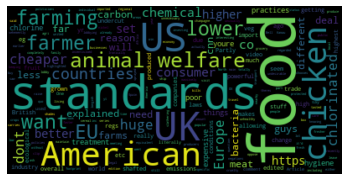

In [50]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [53]:
def show_cloud(land):
    woerter = cleancountry[land]
    wordcloud = WordCloud().generate(woerter)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

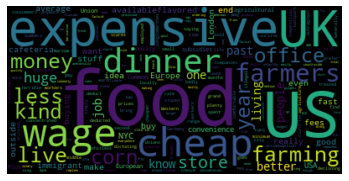

In [54]:
 show_cloud("Poland")

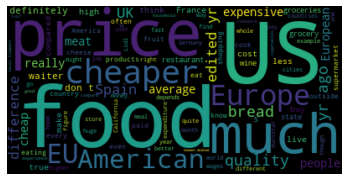

In [55]:
 show_cloud("no_country")

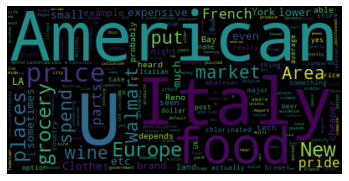

In [60]:
 show_cloud("United States of America")

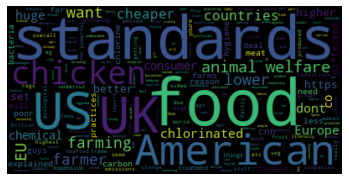

In [56]:
show_cloud("England")

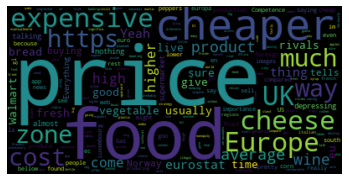

In [59]:
 show_cloud("Spain")

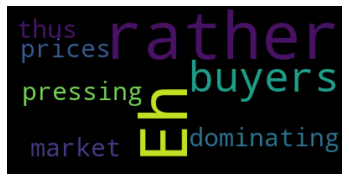

In [58]:
 show_cloud("Germany")

There is not too much to be taken away from these wordclouds at this point. As reflected in the individual contributions, the Poles are most concerned about the differences in food prices arising from immigrant agricultural labor or agricultural labor in low-GDP jurisdictions, an activity to which many Eastern Europeans have contributed in the past. 

Materials to follow up on regarding word clouds: 
https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery
https://towardsdatascience.com/how-to-make-word-clouds-in-python-that-dont-suck-86518cdcb61f

The second link makes reference to using TF-IDF values for better results - might be interesting. 

In [64]:
type(cleancountry)

dict

In [66]:
import json

In [67]:
#Let's export cleancountry as a json file!
# https://www.scaler.com/topics/convert-dictionary-to-json-python/ introduces the json.dump() function.
json.dumps(cleancountry, indent=9)

'{\n         "United States of America": "Why are grocery prices so much lower in Europe compared to the US? Food I\'m aware this is a generalization but whenever I\'m in Europe, I\'m puzzled by the low prices for wine, cheese, meat, fresh produce etc, even in otherwise more expensive countries (Netherlands, Germany, Austria, France, Belgium, etc.).  Why is that? Maybe subsidies or government intervention?  171 Comments    Save  Hide  Report 91% Upvoted Do you have evidence for this? Price collusion is illegal in the US.   5   Walmart is a very small player in the grocery market in the US  They are nowhere near a monopoly in any way   6   Clothes are often not taxed at all in the US, and in addition brands are sometimes positioned differently. For example, Levi\'s products are much cheaper here because they\'re viewed as sort of the default/basic brand of jeans, and couldn\'t justify high prices.   7  American in Italy Roughly converting pounds to dollars in my head, you could live a p

In [70]:
os.listdir()

['230313plan.txt',
 'food_comments1.csv',
 'food_comments2.csv',
 'food_raw1.txt',
 'Meta_info.txt',
 'reddit_food_prices.txt',
 'reddit_food_prices_long.txt',
 'reddit_food_prices_long_macro.txt',
 'reddit_food_prices_long_trash.txt']

In [74]:
#json.dump(cleancountry, open(cleancountry, 'wb'))
#data = json.load(open('cleancountry.json'))
json_object = json.dumps(cleancountry, indent = 9)

In [75]:
json_object

'{\n         "United States of America": "Why are grocery prices so much lower in Europe compared to the US? Food I\'m aware this is a generalization but whenever I\'m in Europe, I\'m puzzled by the low prices for wine, cheese, meat, fresh produce etc, even in otherwise more expensive countries (Netherlands, Germany, Austria, France, Belgium, etc.).  Why is that? Maybe subsidies or government intervention?  171 Comments    Save  Hide  Report 91% Upvoted Do you have evidence for this? Price collusion is illegal in the US.   5   Walmart is a very small player in the grocery market in the US  They are nowhere near a monopoly in any way   6   Clothes are often not taxed at all in the US, and in addition brands are sometimes positioned differently. For example, Levi\'s products are much cheaper here because they\'re viewed as sort of the default/basic brand of jeans, and couldn\'t justify high prices.   7  American in Italy Roughly converting pounds to dollars in my head, you could live a p

Now, the json object is in place in the folder as "cleancountry.json"!

In [76]:
os.listdir()

['230313plan.txt',
 'cleancountry.json',
 'food_comments1.csv',
 'food_comments2.csv',
 'food_raw1.txt',
 'Meta_info.txt',
 'reddit_food_prices.txt',
 'reddit_food_prices_long.txt',
 'reddit_food_prices_long_macro.txt',
 'reddit_food_prices_long_trash.txt']

# Conclusion

Things are much clearer now, but some more remains to be done. 
1. We should get the visualizations to reflect the contribution of British contributors better by putting all of them in the United Kingdom 
category.
2. Similarly, contributors from smaller countries should not be lost, but assembled into an "others" category, where the no_country posts could also find a home